In [1]:
## Load all the libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# load the dataset
data = pd.read_csv('finalconsolidatedcy22earnings_feb2023.xlsx-sheet1.csv')
data

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION,TOTAL_ GROSS,POSTAL
0,"Gavin,Donna M.",Boston Police Department,Police Lieutenant (Det),"53,226.90",NaN,"1,045,845.44",463.52,NaN,NaN,"12,812.39","1,112,348.25",02186
1,"Cassellius,Brenda",Superintendent,Superintendent,"179,109.61",NaN,"417,839.83",NaN,NaN,NaN,NaN,"596,949.44",55419
2,"Dempsey,John",Boston Fire Department,Commissioner (BFD),"133,653.78",NaN,"312,752.53",NaN,NaN,NaN,NaN,"446,406.31",02152
3,"Demesmin,Stanley",Boston Police Department,Police Lieutenant (Det),"145,775.26",NaN,"13,932.92","196,515.25",NaN,"11,880.00","29,155.26","397,258.69",02052
4,"Smith,Sean P",Boston Police Department,Police Lieutenant,"142,535.62",NaN,"18,827.45","142,692.38",NaN,"46,365.00","35,633.88","386,054.33",02186
...,...,...,...,...,...,...,...,...,...,...,...,...
23199,"wheeler,Stephen clifford",Boston Cntr - Youth & Families,Lifeguard I,42.01,NaN,NaN,NaN,NaN,NaN,NaN,42.01,02129
23200,"Harris,Gloria",BPS Office Of Budget Mgmt,Attendant,24.23,NaN,NaN,NaN,NaN,NaN,NaN,24.23,02136
23201,"Jackson,Wanita Tina",Boston Police Department,School Traffic Supv,23.68,NaN,NaN,NaN,NaN,NaN,NaN,23.68,02119
23202,"Paul,Desmond",BPS Substitute Teachers/Nurs,Substitute Teacher HE,21.28,NaN,NaN,NaN,NaN,NaN,NaN,21.28,02119


In [3]:
# Rename variables
data.rename(columns={'NAME': 'name',
                     'DEPARTMENT_NAME': 'department_name',
                     'TITLE': 'title',
                     'REGULAR': 'regular',
                     'RETRO': 'retro',
                     'OTHER': 'other',
                     'OVERTIME': 'overtime',
                     'INJURED': 'injured',
                     'DETAIL': 'detail',
                     'QUINN_EDUCATION': 'quinn_education',
                     'TOTAL_ GROSS': 'total_gross',
                     'POSTAL': 'postal'}, inplace=True)

In [4]:
#checking out the variable type
data.dtypes


name               object
department_name    object
title              object
regular            object
retro              object
other              object
overtime           object
injured            object
detail             object
quinn_education    object
total_gross        object
postal             object
dtype: object

In [5]:

print(data.shape)

(23204, 12)


In [6]:
data.describe()

,name,department_name,title,regular,retro,other,overtime,injured,detail,quinn_education,total_gross,postal
count,23204,23204,23204,22604,3092,15826,6812,1221,2116,1369,23204,23204
unique,23133,232,1507,19422,2917,6294,6740,1150,1246,818,22428,580
top,"Kelly,Michael",Boston Police Department,Teacher,"104,644.14",728.97,"1,250.00",283.12,"94,596.32",368.00,"26,161.00","1,500.00",02124
freq,4,3040,5304,49,25,1149,4,9,77,31,31,1867


In [7]:

print(data.columns)


Index(['name', 'department_name', 'title', 'regular', 'retro', 'other',
       'overtime', 'injured', 'detail', 'quinn_education', 'total_gross',
       'postal'],
      dtype='object')


In [8]:
# Drop 'Retro' and 'Injured' columns ,as this varible had a lot of null values and it's not usefull for my modeling
data.drop(columns=['retro', 'injured'], inplace=True)

In [9]:
# Remove commas and convert numeric columns to float
numeric_columns = ['regular', 'other', 'overtime', 'detail', 'quinn_education', 'total_gross']
data[numeric_columns] = data[numeric_columns].replace(',', '', regex=True).astype(float)

# Fill 0 in blank values of 'other' and 'overtime' columns
data['other'].fillna(0, inplace=True)
data['overtime'].fillna(0, inplace=True)

# Fill mean in NaN values of other numeric variables
columns_to_fill_mean = ['regular', 'detail', 'quinn_education', 'total_gross']
data[columns_to_fill_mean] = data[columns_to_fill_mean].apply(lambda x: x.fillna(x.mean()))



In [10]:
data

,name,department_name,title,regular,other,overtime,detail,quinn_education,total_gross,postal
0,"Gavin,Donna M.",Boston Police Department,Police Lieutenant (Det),53226.90,1045845.44,463.52,15287.927018,12812.390000,1112348.25,02186
1,"Cassellius,Brenda",Superintendent,Superintendent,179109.61,417839.83,0.00,15287.927018,20516.305274,596949.44,55419
2,"Dempsey,John",Boston Fire Department,Commissioner (BFD),133653.78,312752.53,0.00,15287.927018,20516.305274,446406.31,02152
3,"Demesmin,Stanley",Boston Police Department,Police Lieutenant (Det),145775.26,13932.92,196515.25,11880.000000,29155.260000,397258.69,02052
4,"Smith,Sean P",Boston Police Department,Police Lieutenant,142535.62,18827.45,142692.38,46365.000000,35633.880000,386054.33,02186
...,...,...,...,...,...,...,...,...,...,...
23199,"wheeler,Stephen clifford",Boston Cntr - Youth & Families,Lifeguard I,42.01,0.00,0.00,15287.927018,20516.305274,42.01,02129
23200,"Harris,Gloria",BPS Office Of Budget Mgmt,Attendant,24.23,0.00,0.00,15287.927018,20516.305274,24.23,02136
23201,"Jackson,Wanita Tina",Boston Police Department,School Traffic Supv,23.68,0.00,0.00,15287.927018,20516.305274,23.68,02119
23202,"Paul,Desmond",BPS Substitute Teachers/Nurs,Substitute Teacher HE,21.28,0.00,0.00,15287.927018,20516.305274,21.28,02119


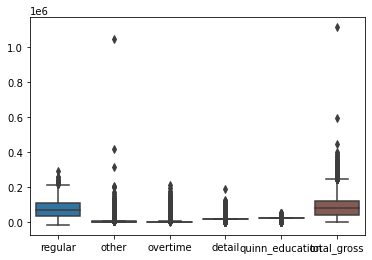

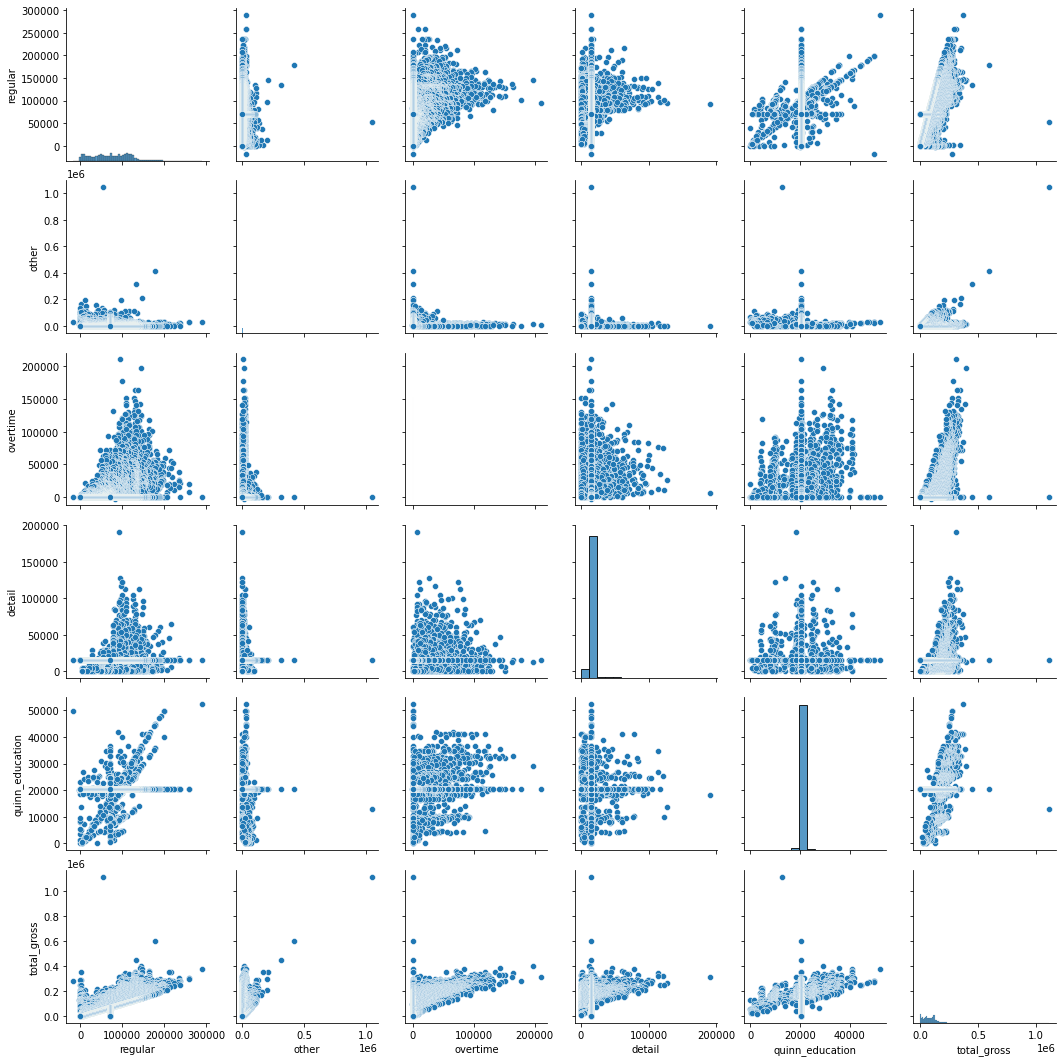

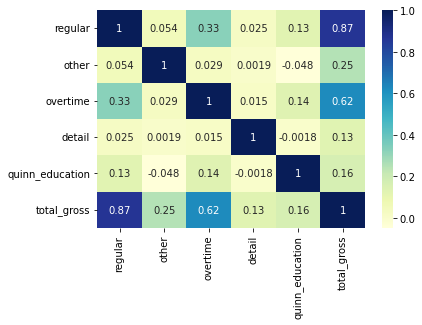

In [14]:
# Check for outliers and unusual patterns in numerical variables
sns.boxplot(data=data[numeric_columns])
plt.show()

# Explore relationships between numerical variables using scatter plots or pair plots
sns.pairplot(data=data[numeric_columns])
plt.show()

# Calculate correlation matrix to identify variable relationships
correlation_matrix = data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.show()


In [12]:
# create a feature representing the ratio of overtime pay to regular pay.

data['overtime_regular_ratio'] = data['overtime'] / data['regular']

# Convert 'Total Gross Pay' to numeric by removing commas and converting to float
data['total_gross'] = data['total_gross'].replace('[\$,]', '', regex=True).astype(float)

# Create the 'Total Pay Increase' feature
data['Total Pay Increase'] = data['total_gross'] - data['regular']

In [13]:
# # LinearRegression model 

# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression


# categorical_columns = ['name', 'department_name', 'title', 'postal']
# numerical_columns = [col for col in data.columns if col not in categorical_columns and col != 'total_gross']




In [ ]:
# # Convert categorical variables to one-hot encoded representation
# data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# # Split the data into training and testing sets
# X = data_encoded.drop(columns=['total_gross'])
# y = data_encoded['total_gross']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Fit the Linear Regression model
# model = LinearRegression()
# model.fit(X_train, y_train)


In [ ]:
# # Make predictions and evaluate the model as before
# y_pred = model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# print("Mean Squared Error:", mse)
# print("R-squared:", r2)

In [ ]:
r2

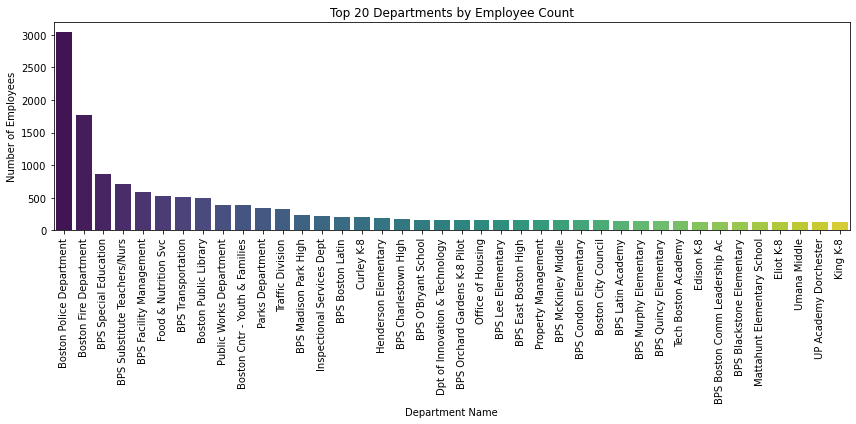

In [34]:
# Get the top 20 departments by employee count
top_departments = data['department_name'].value_counts().nlargest(40)

# Create a bar plot for the top departments
plt.figure(figsize=(12, 6))
sns.barplot(x=top_departments.index, y=top_departments.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Department Name')
plt.ylabel('Number of Employees')
plt.title('Top 20 Departments by Employee Count')
plt.tight_layout()
plt.show()

In [35]:
top_departments

Boston Police Department          3040
Boston Fire Department            1769
BPS Special Education              873
BPS Substitute Teachers/Nurs       711
BPS Facility Management            592
Food & Nutrition Svc               523
BPS Transportation                 514
Boston Public Library              501
Public Works Department            392
Boston Cntr - Youth & Families     384
Parks Department                   342
Traffic Division                   325
BPS Madison Park High              241
Inspectional Services Dept         228
BPS Boston Latin                   203
Curley K-8                         200
Henderson Elementary               191
BPS Charlestown High               170
BPS O'Bryant School                166
Dpt of Innovation & Technology     162
BPS Orchard Gardens K-8 Pilot      161
Office of Housing                  159
BPS Lee Elementary                 157
BPS East Boston High               157
Property Management                155
BPS McKinley Middle      

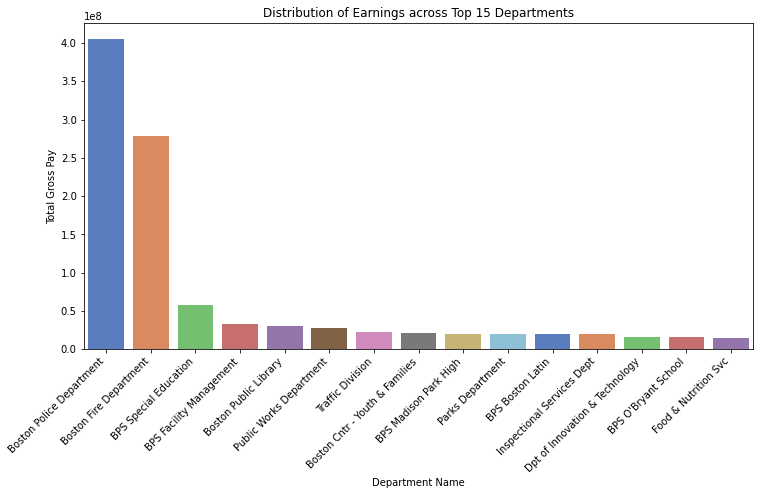

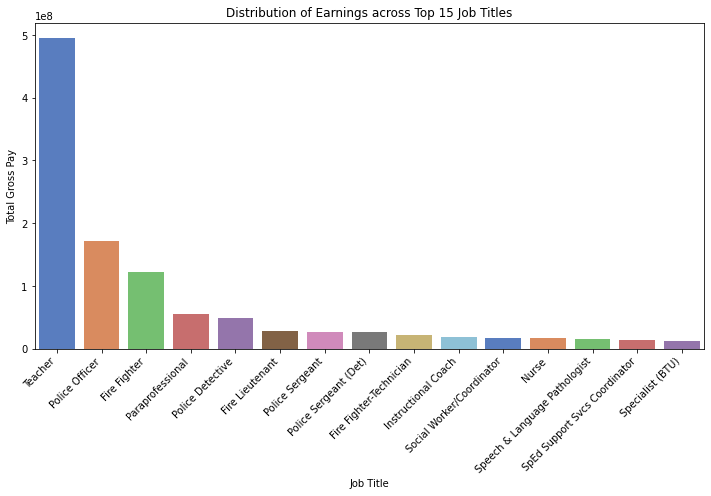

In [40]:
# Get the top 40 departments by total gross pay
top_departments = data.groupby('department_name')['total_gross'].sum().nlargest(15)

# Create a bar plot to visualize the distribution of earnings across departments
plt.figure(figsize=(12, 6))
sns.barplot(x=top_departments.index, y=top_departments.values, palette='muted')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Department Name')
plt.ylabel('Total Gross Pay')
plt.title('Distribution of Earnings across Top 15 Departments')
plt.show()

# Get the top 15 job titles by total gross pay
top_job_titles = data.groupby('title')['total_gross'].sum().nlargest(15)

# Create a bar plot to visualize the distribution of earnings across job titles
plt.figure(figsize=(12, 6))
sns.barplot(x=top_job_titles.index, y=top_job_titles.values, palette='muted')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Job Title')
plt.ylabel('Total Gross Pay')
plt.title('Distribution of Earnings across Top 15 Job Titles')
plt.show()

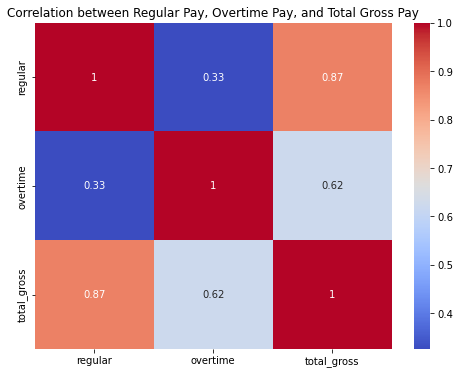

In [30]:
# Q2: Correlation between regular pay, overtime pay, and total gross pay

# Select the relevant numerical columns for Q2
correlation_columns = ['regular', 'overtime', 'total_gross']

# Calculate the correlation matrix
correlation_matrix = data[correlation_columns].corr()

# Create a heatmap to visualize the correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Regular Pay, Overtime Pay, and Total Gross Pay')
plt.show()



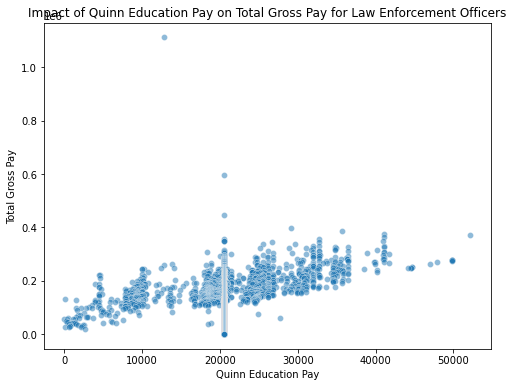

In [31]:
# Q3: Impact of Quinn Education Pay on Total Gross Pay for law enforcement officers

# Filter the data for law enforcement officers who receive Quinn Education Pay
law_enforcement_data = data[data['quinn_education'] > 0]

# Create a scatter plot to visualize the impact of Quinn Education Pay on Total Gross Pay
plt.figure(figsize=(8, 6))
sns.scatterplot(x='quinn_education', y='total_gross', data=law_enforcement_data, alpha=0.5)
plt.xlabel('Quinn Education Pay')
plt.ylabel('Total Gross Pay')
plt.title('Impact of Quinn Education Pay on Total Gross Pay for Law Enforcement Officers')
plt.show()


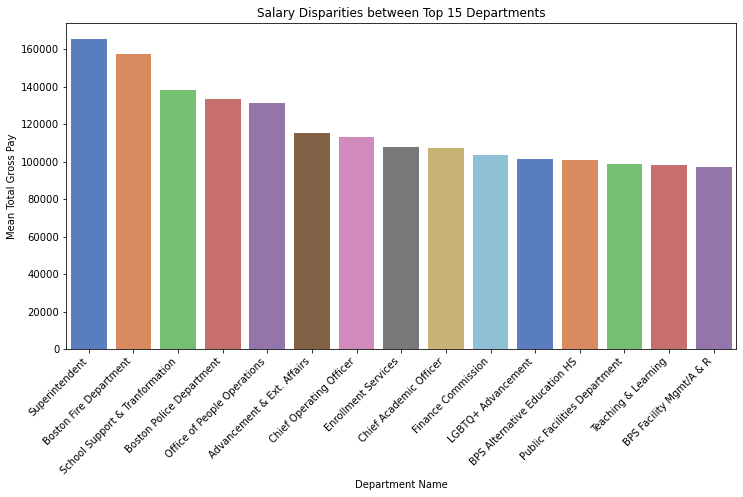

In [41]:
# Select the top N departments
top_departments = 15  # Change this value to the desired number of top departments

# Calculate the mean total gross pay for each department
department_salaries = data.groupby('department_name')['total_gross'].mean().nlargest(top_departments)

# Create a bar plot to visualize the salary disparities between top N departments
plt.figure(figsize=(12, 6))
sns.barplot(x=department_salaries.index, y=department_salaries.values, palette='muted')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Department Name')
plt.ylabel('Mean Total Gross Pay')
plt.title(f'Salary Disparities between Top {top_departments} Departments')
plt.show()


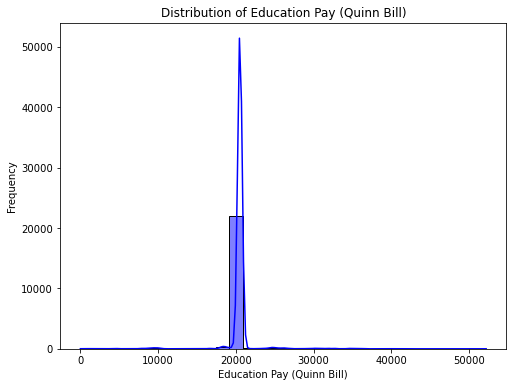

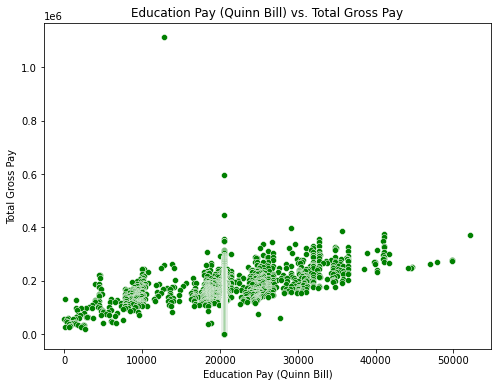

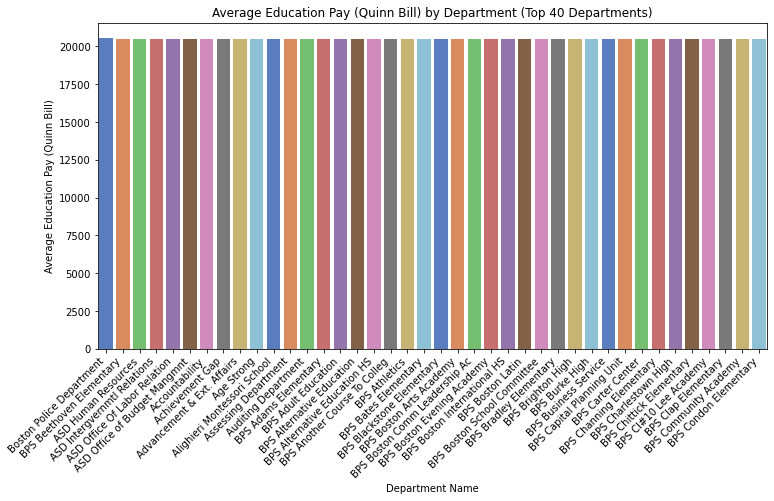

In [42]:
# Visualization of Education Pay Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['quinn_education'], bins=30, kde=True, color='blue')
plt.xlabel('Education Pay (Quinn Bill)')
plt.ylabel('Frequency')
plt.title('Distribution of Education Pay (Quinn Bill)')
plt.show()

# Scatter Plot of Education Pay vs. Total Gross Pay
plt.figure(figsize=(8, 6))
sns.scatterplot(x='quinn_education', y='total_gross', data=data, color='green')
plt.xlabel('Education Pay (Quinn Bill)')
plt.ylabel('Total Gross Pay')
plt.title('Education Pay (Quinn Bill) vs. Total Gross Pay')
plt.show()

# Grouped Bar Plot for Departments
plt.figure(figsize=(12, 6))
department_education_pay = data.groupby('department_name')['quinn_education'].mean().nlargest(40)
sns.barplot(x=department_education_pay.index, y=department_education_pay.values, palette='muted')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Department Name')
plt.ylabel('Average Education Pay (Quinn Bill)')
plt.title('Average Education Pay (Quinn Bill) by Department (Top 40 Departments)')
plt.show()


In [47]:
# Regression Model to predict Total Gross Pay based on Education Pay

#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split  # Add this import
#from sklearn.metrics import mean_squared_error, r2_score

#X = data[['quinn_education']]
#y = data['total_gross']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#model = LinearRegression()
#model.fit(X_train, y_train)

#y_pred = model.predict(X_test)

#print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
#print("R-squared:", r2_score(y_test, y_pred))

Mean Squared Error: 3084483688.085306
R-squared: 0.013455438871567638


In [ ]:
# # Select important numerical features based on correlation coefficients
# selected_features = ['regular', 'Overtime', 'total_gross']
# data_selected_features = data[selected_features]

# # Display the first few rows of the selected features DataFrame
# print(data_selected_features.head())

# # Check for multicollinearity using a correlation matrix heatmap
# sns.heatmap(data_selected_features.corr(), annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix of Selected Features')
# plt.show()

# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# # Split the data into training and testing sets
# X = data_selected_features.drop('total_gross', axis=1)
# y = data_selected_features['total_gross']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Fit a linear regression model
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test)

# # Evaluate the model performance
# mse = mean_squared_error(y_test, y_pred)
# print('Mean Squared Error:', mse)

# # Visualize outliers using box plots
# sns.boxplot(data=data_selected_features)
# plt.title('Box Plot of Selected Features')
# plt.show()

# # Remove outliers (replace with NaNs or apply outlier treatment techniques if necessary)
# data_selected_features_no_outliers = data_selected_features.copy()
# data_selected_features_no_outliers = data_selected_features_no_outliers[(data_selected_features_no_outliers < data_selected_features_no_outliers.quantile(0.95)).all(axis=1)]

# # Explore the distribution of pay across different job titles
# sns.boxplot(x='title', y='total_gross', data=data)
# plt.xticks(rotation=90)
# plt.title('Distribution of Total Gross Pay Across Job Titles')
# plt.show()
# 

In [ ]:
# ### Gradient booosting ( created some random model for comparision)



# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.metrics import mean_squared_error, r2_score

# # Define categorical columns
# categorical_columns = ['name', 'department_name', 'title', 'postal']

# # Convert categorical variables to one-hot encoded representation
# data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# # Split the data into training and testing sets (70:30 split)
# X = data_encoded.drop(columns=['total_gross'])
# y = data_encoded['total_gross']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Fit the Gradient Boosting Regression model
# model = GradientBoostingRegressor()
# model.fit(X_train, y_train)

# # Make predictions and evaluate the model
# y_pred = model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("Mean Squared Error:", mse)
# print("R-squared:", r2)
